In [1]:
import sys
print(sys.version)
import tensorflow as tf
print(tf.__version__)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
2.2.0


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

import json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])
print(len(sentences))

--2020-05-24 06:38:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-05-24 06:38:37 (238 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]

26709


In [0]:
training_size = 15000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"
padding_type = 'post'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type, padding=padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type, padding=padding_type)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
import numpy as np


training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)



In [10]:
num_epochs = 30
history = model.fit(padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.6161 - accuracy: 0.6393 - val_loss: 0.5254 - val_accuracy: 0.8065
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4082 - accuracy: 0.8457 - val_loss: 0.3908 - val_accuracy: 0.8309
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3097 - accuracy: 0.8833 - val_loss: 0.3583 - val_accuracy: 0.8472
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2613 - accuracy: 0.8990 - val_loss: 0.3477 - val_accuracy: 0.8485
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2271 - accuracy: 0.9131 - val_loss: 0.3440 - val_accuracy: 0.8530
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1991 - accuracy: 0.9245 - val_loss: 0.3511 - val_accuracy: 0.8492
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1760 - accuracy: 0.9353 - val_loss: 0.3571 - val_accuracy: 0.8499
Epoch 

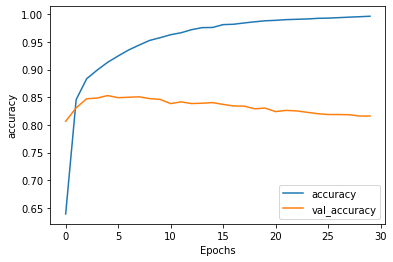

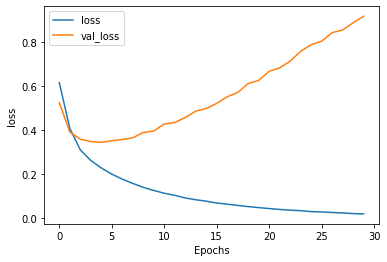

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")